In [147]:
import numpy as np
import pandas as pd
import math
from typing import List
import string
import matplotlib.pyplot as plt

In [148]:
data = pd.read_csv('MOM_test.csv', sep =';')
data = data[data['product']=='STARFRUIT']
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.000000
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.000000
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,0.000000
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,-2233.468750
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,-2239.375000
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,-2239.517578
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,-2241.142578


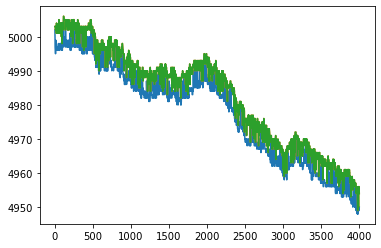

In [149]:
fig0, ax0 = plt.subplots()
ax0.plot(data['bid_price_1'],label = 'bid')
ax0.plot(data['ask_price_1'],label = 'ask')
plt.show()

In [203]:
# Initialize variables
lambda_logs = []
accumulated_log = ""
in_lambda_log = False
time = 0
dictLog = {}
timesteps = 2000

with open('MR_ewma_log.log', 'r') as file:
    log_data = file.readlines()

# Iterate through each line in the log file

for line in log_data:
    if '"lambdaLog"' in line:
        # Start accumulating lambda log
        in_lambda_log = True
        accumulated_log += line.split('"lambdaLog": "')[1].strip()
    elif in_lambda_log:
        # Check if we reached the end of the block
        if 'timestamp' in line:
            # Split the accumulated log by newline character
            logs = accumulated_log.split('",')[0]
            logs = logs.split('\\n')#[:-1]
            # Remove any empty strings
            logs = [log for log in logs if log.strip()]
            # Append each log to the list
            for item in logs:
                key, value= item.split(':')
                dictLog[key] = dictLog.get(key, [np.nan]*timesteps)
                dictLog[key][time] = value
                
            accumulated_log = ""
            in_lambda_log = False
            time +=1
        else:
            # Continue accumulating lambda log
            accumulated_log += line.strip()
            

# Convert the list of strings to a DataFrame
dfLog = pd.DataFrame.from_dict(dictLog, dtype = np.float64)


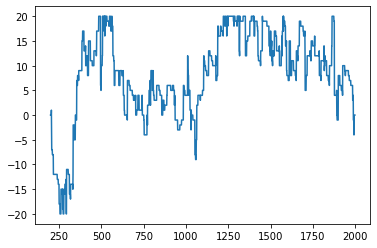

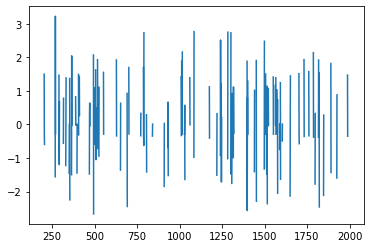

In [204]:
fig11, ax11 = plt.subplots()
ax11.plot(dfLog['Current'],label = 'Current_Position')

fig12, ax12 = plt.subplots()
ax12.plot(dfLog['signal'],label = 'signal')

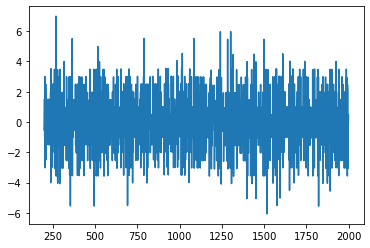

In [205]:
fig2, ax2 = plt.subplots()

ax2.plot(dfLog['projected_mid']-(dfLog['Best_Bid']+dfLog['Best_Ask'])/2)
plt.show()

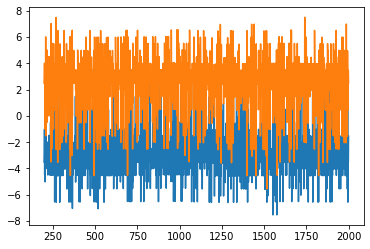

In [206]:
fig2, ax2 = plt.subplots()
ax2.plot(dfLog['projected_mid']-dfLog['Best_Ask'])
ax2.plot(dfLog['projected_mid']-dfLog['Best_Bid'])
plt.show()

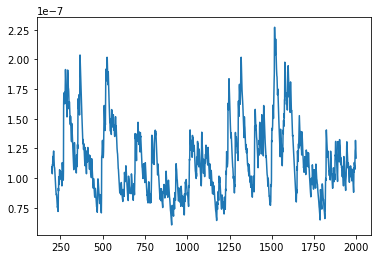

In [207]:
fig3, ax3 = plt.subplots()
ax3.plot(dfLog['ewma_sig2'],label = 'sig2')
plt.show()

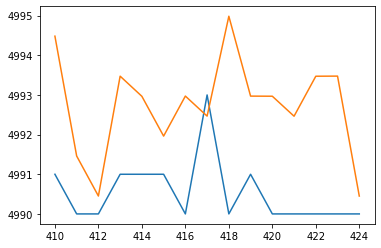

In [208]:
t0, t1 = (410,425)

#fig4, ax4 = plt.subplots()
#ax4.plot((dfLog['Current']-dfLog['Current'].shift(1))[t0:t1],label = 'Position Change')

fig5, ax5 = plt.subplots()
ax5.plot(dfLog['Best_Bid'][t0:t1])
ax5.plot(dfLog['projected_mid'][t0:t1])
#ax6 = ax5.twinx()
#ax6.plot(dfLog['projected'][t0:t1])
plt.show()

